# Goals
If a time series data of a physical process is given the student should be able to analyze and forecast the data. The student should also be able to evaluate the error of the method.

## Problem
Suppose we have a damped harmonic oscillator and its position co-ordinates are measured at every time interval $dt $.

The time points \( t \) are generated from 0 to \( T \) with a step size \( dt \):
$t = 0, \, dt, \, 2dt, \, \ldots, \, (n-1)dt$
where $( n = \frac{T}{dt} $).


The position \( x(t) \) of the damped harmonic oscillator is given by:
$x(t) = A e^{-bt} \cos(\omega t)$

where:
\begin{align*}
A; \text{ is the amplitude}, \\
b; \text{ is the damping coefficient}, \\
\omega; \text{ is the angular frequency}.
\end{align*}


The noisy position data $( x_{\text{noisy}}(t) $) is obtained by adding Gaussian noise to the position data:

$x_{\text{noisy}}(t) = x(t) + \epsilon(t)$

where $( \epsilon(t) \sim \mathcal{N}(0, \sigma^2) $) is normally distributed noise with mean 0 and standard deviation $( \sigma $).

The code given in the cell below stores the noisy time dependent position and the time information of the oscillator to an excel file.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Set the random seed for reproducibility
np.random.seed(42)

# Define parameters for the damped harmonic oscillator
A = 1.0    # Amplitude
b = 0.05   # Damping coefficient
omega = 2 * np.pi / 5  # Angular frequency
T = 100    # Total time
dt = 0.1   # Time step

# Generate time points
t = np.arange(0, T, dt)

# Generate the damped oscillation data
x = A * np.exp(-b * t) * np.cos(omega * t)

# Add some noise to the data
noise = np.random.normal(scale=0.1, size=len(t))
x_noisy = x + noise

# Create a DataFrame
df = pd.DataFrame({'Time': t, 'Position': x_noisy})

df.to_excel('damped_oscillator.xlsx','series')

<ipython-input-1-76b0da498876>:30: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  df.to_excel('damped_oscillator.xlsx','series')


### Data importation and visualization
Import the excel file and visulaize the data with different techniques

In [2]:
# Exercise 1
# Upload the excel file damped_oscillator.xlsx using pandas to a dataframe object
series = pd.read_excel('damped_oscillator.xlsx',
                    sheet_name='series', header=0, index_col=0,
                     dtype=float)

     Time  Position
0     0.0  1.049671
1     0.1  0.973340
2     0.2  1.023714
3     0.3  1.068237
4     0.4  0.835539
..    ...       ...
995  99.5 -0.022521
996  99.6  0.185792
997  99.7  0.070444
998  99.8 -0.050526
999  99.9  0.063977

[1000 rows x 2 columns]


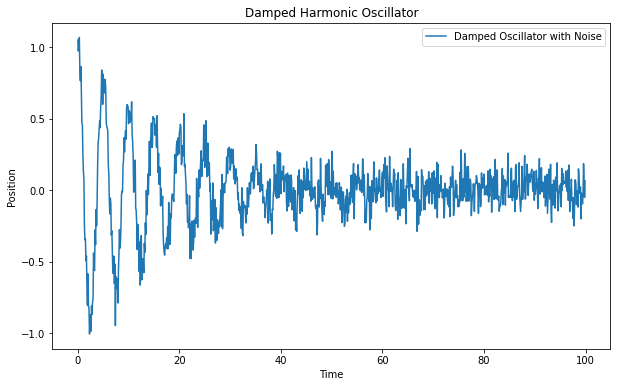

In [3]:
# Exercise 2
# Plot time (x-axis) versus position (y-ais) using matplotlib pyplot. Add appropriate labels
plt.figure(figsize=(10, 6))
plt.plot(series['Time'], series['Position'], label='Damped Oscillator with Noise')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Damped Harmonic Oscillator')
plt.legend()
plt.show()

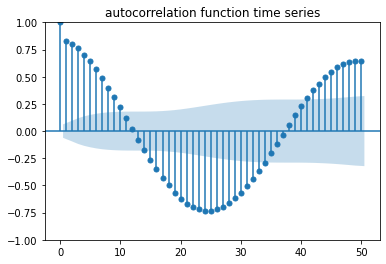

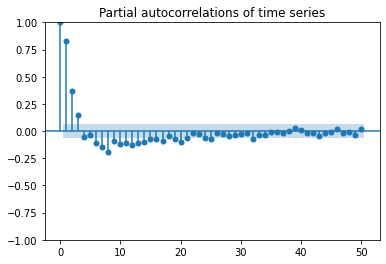

In [27]:
# Exercise 3
# Plot the autocorrelation function time series of the position data
# Plot the Partial autocorrelation function time series of the position data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(series['Position'], title='autocorrelation function time series', lags=50)
plot_pacf(series['Position'], title='Partial autocorrelations of time series', lags=50)
plt.show()

### Modeling and forecasting
After basic drawing and visulazation of the data try to analyze the position data and do some forcasting using the SARIMAX model

In [4]:
# Exercise 4
# Define the SARIMAX model
#order = (2, 0, 2)  # (p, d, q) parameters for ARIMA
#seasonal_order = (1, 1, 1, 10)  # (P, D, Q, S) parameters for seasonal component

# find optimal parameters
import itertools

# Define the p, q parameters to take any value between 1 and 2, and the d parameter to take any value between 0 and 1
p = d = q = range(1, 3)
d = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets (i.e., P, D, Q)
seasonal_pdq = [(x[0], x[1], x[2], 10) for x in list(itertools.product(p, d, q))]

In [5]:
# Exercise 5
# Fit the model
#model = SARIMAX(df['Position'], order=pdq, seasonal_order=seasonal_pdq)
#results = model.fit()

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

# Indentification of best model from different combinations of pdq and seasonal_pdq
best_score, best_param, best_paramSeasonal = float("inf"), None, None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(series['Position'], order=param, seasonal_order=param_seasonal, enforce_invertibility=False)
            results = mod.fit(disp=False)
            if results.aic < best_score:
                best_score, best_param, best_paramSeasonal = results.aic, param, param_seasonal
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue # if fit fails, just continue to the next parameters combionation

ARIMA(1, 0, 1)x(1, 0, 1, 10) - AIC:-1321.8886521465693
ARIMA(1, 0, 1)x(1, 0, 2, 10) - AIC:-1346.28344449192
ARIMA(1, 0, 1)x(1, 1, 1, 10) - AIC:-1250.7218854245448
ARIMA(1, 0, 1)x(1, 1, 2, 10) - AIC:-1256.5750205595916
ARIMA(1, 0, 1)x(2, 0, 1, 10) - AIC:-1362.2127137664545
ARIMA(1, 0, 1)x(2, 0, 2, 10) - AIC:-1474.6775475371155
ARIMA(1, 0, 1)x(2, 1, 1, 10) - AIC:-1285.0891675170096
ARIMA(1, 0, 1)x(2, 1, 2, 10) - AIC:-1293.1744095660351
ARIMA(1, 0, 2)x(1, 0, 1, 10) - AIC:-1346.0730304296708
ARIMA(1, 0, 2)x(1, 0, 2, 10) - AIC:-1368.5673001202413
ARIMA(1, 0, 2)x(1, 1, 1, 10) - AIC:-1274.054360127256
ARIMA(1, 0, 2)x(1, 1, 2, 10) - AIC:-1280.6927327630815
ARIMA(1, 0, 2)x(2, 0, 1, 10) - AIC:-1381.9463978415886
ARIMA(1, 0, 2)x(2, 0, 2, 10) - AIC:-1479.0468936118361
ARIMA(1, 0, 2)x(2, 1, 1, 10) - AIC:-1307.6070703544738
ARIMA(1, 0, 2)x(2, 1, 2, 10) - AIC:-1313.300022809133
ARIMA(1, 1, 1)x(1, 0, 1, 10) - AIC:-1322.4749320746691
ARIMA(1, 1, 1)x(1, 0, 2, 10) - AIC:-1344.1376726950834
ARIMA(1, 1, 1)

In [6]:
# Exercise 6
# Print the best set of parameters according to the AIC.
print('The best model is ARIMA{}x{} - AIC:{}'.format(best_param, best_paramSeasonal, best_score))

The best model is ARIMA(2, 0, 2)x(1, 0, 1, 10) - AIC:-1687.628061391974


In [7]:
# Exercise 7
# Print the summary of the model
#order = (2, 0, 2)  # (p, d, q) parameters for ARIMA
#seasonal_order = (1, 1, 1, 10)  # (P, D, Q, S) parameters for seasonal component
mod = SARIMAX(series['Position'], order=best_param, seasonal_order=best_paramSeasonal, enforce_invertibility=False)
results=mod.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                             Position   No. Observations:                 1000
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 10)   Log Likelihood                 850.814
Date:                              Fri, 17 May 2024   AIC                          -1687.628
Time:                                      15:59:46   BIC                          -1653.274
Sample:                                           0   HQIC                         -1674.571
                                             - 1000                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9831      0.000   4302.407      0.000       1.982       1.984
ar.L2         -0.99

In [8]:
# Exercise 8
# Forecast future values for 50 steps
n_forecast = 50  # Number of steps to forecast
forecast = results.get_forecast(steps=n_forecast)
forecast_index = np.arange(T, T + n_forecast * dt, dt)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()


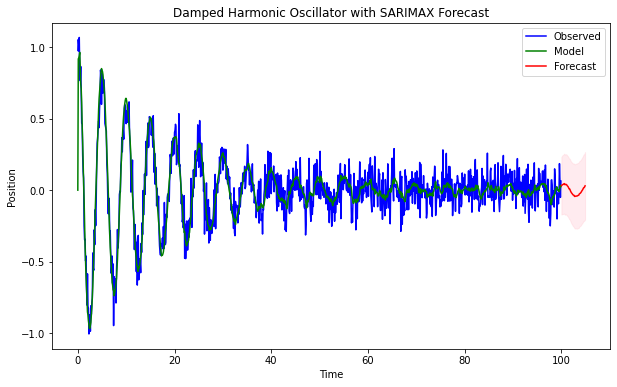

In [9]:
# Exercise 8
# Plot the results and the forecast
plt.figure(figsize=(10, 6))
predictions = results.predict()
# Plot the original data i.e. time (x-axis) vs position
plt.plot(series['Time'], series['Position'], label='Observed', color='blue')
# Plot the time (x-axis) vs predictions 
plt.plot(series['Time'], predictions, label='Model', color='green')
# Plot the forecast index (x-axis) vs forecast values
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')

plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Damped Harmonic Oscillator with SARIMAX Forecast')
plt.legend()
plt.show()

### Error analysis
Analyse the errors of the predictions

In [10]:
# # Exercise 9
# Sum of Squares Total (SST),
# summ of Squares Error (SSE),
# Sum of Squares Regression (SSR),
#and the coefficient of determination (R²) 
observed = series['Position']
mean_observed = np.mean(observed)
sst = np.sum((observed - mean_observed) ** 2)
sse = np.sum((observed - predictions) ** 2)
ssr = sst - sse
r2 = 1 - (sse / sst)

# Print the results
print(f'SST: {sst:.2f}')
print(f'SSE: {sse:.2f}')
print(f'SSR: {ssr:.2f}')
print(f'R²: {r2:.2f}')


SST: 60.58
SSE: 11.60
SSR: 48.98
R²: 0.81


In [11]:
# # Exercise 10
# Calculate degrees of freedom 
n = len(observed)  # Number of observations
p = len(results.params)  # Number of predictors in SARIMAX

# Calculate MST, MSE, MSR, and F-score  for Holt's linear method
mst = sst / (n - 1)
mse = sse / (n - p - 1)
msr = ssr / p
f_score = msr / mse

# Print the results
print(f'MST: {mst:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MSR: {msr:.2f}')
print(f'F-score: {f_score:.2f}')

MST: 0.06
MSE: 0.01
MSR: 7.00
F-score: 598.21


### Holt's linear model

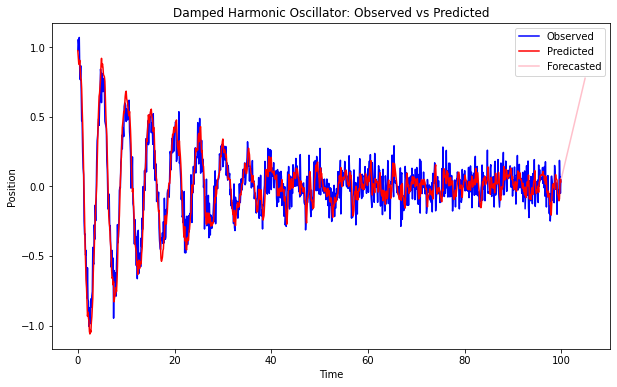

In [12]:
# Now let's try with Holt's linear model
# Fit the Holt's linear trend model to same data
from statsmodels.tsa.api import Holt

model = Holt(df['Position'])
holt_results = model.fit(optimized=True)

# Make in-sample predictions
holt_predictions = holt_results.fittedvalues

# Make forecast for future points
forecast_steps = 50
holt_forecast = holt_results.forecast(steps=forecast_steps)
forecast_index = np.arange(T, T + n_forecast * dt, dt)

predictions = results.predict()
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Position'], label='Observed', color='blue')
plt.plot(df['Time'], holt_predictions, label='Predicted', color='red')
plt.plot(forecast_index, holt_forecast, label='Forecasted', color='pink')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Damped Harmonic Oscillator: Observed vs Predicted')
plt.legend()
plt.show()